In [1]:
import warnings
warnings.simplefilter('ignore')
import os.path
import gc

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [71]:
tb = pd.read_table('reachabilityt1d15.0.in', header=None, index_col=0)

Text(0,0.5,'Indegree')

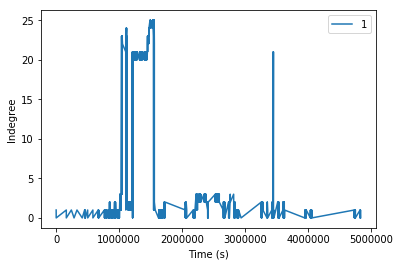

In [13]:
myplot = tb.plot()
myplot.set_xlabel("Time (s)")
myplot.set_ylabel("Indegree")

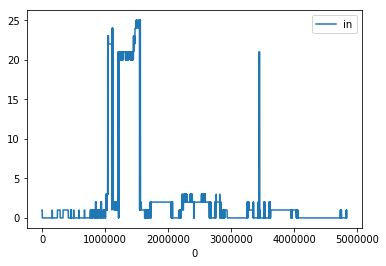

In [15]:
newtb = tb.reindex(range(1, tb.index.max()+1), method='ffill')
newtb.columns = ['in']
newtb.plot()

In [16]:
def smooth(df):
    return df.reindex(range(1, df.index.max()+1), method='ffill')

In [17]:
newtbout = smooth(pd.read_table('reachabilityt1d15.0.out', header=None, index_col=0))

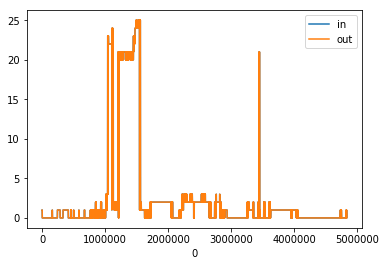

In [18]:
newtbout.columns = ['out']
concat = pd.concat([newtb, newtbout], axis=1)
concat.plot()

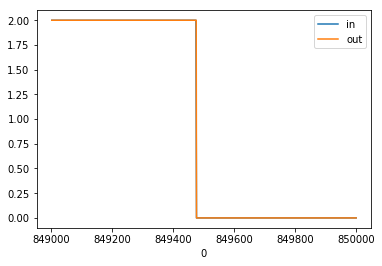

In [28]:
concat = pd.concat([newtb[849000:850000], newtbout[849000:850000]], axis=1)
concat.plot()

In [57]:
for index, row in tb.iterrows():
    print(index, row[1])

1 1.0
387 0.0
622 1.0
637 0.0
160988 1.0
161003 0.0
241279 1.0
284275 0.0
330630 1.0
413913 0.0
452126 1.0
452254 0.0
453512 1.0
453527 0.0
453898 1.0
453913 0.0
454256 1.0
460992 0.0
461011 1.0
461217 0.0
461691 1.0
461823 0.0
461846 1.0
461861 0.0
461871 1.0
463060 0.0
463082 1.0
463097 0.0
463363 1.0
463378 0.0
500434 1.0
500449 0.0
500905 1.0
500920 0.0
500926 1.0
500941 0.0
583402 1.0
583420 0.0
583431 1.0
583446 0.0
583457 1.0
583484 0.0
668623 1.0
668638 0.0
668881 1.0
668896 0.0
669120 1.0
674641 0.0
675741 1.0
675756 0.0
675924 1.0
675939 0.0
765416 1.0
765432 0.0
765450 1.0
765466 0.0
765830 1.0
766607 0.0
766841 1.0
767031 0.0
767062 1.0
767157 0.0
769846 1.0
769906 0.0
770724 1.0
770739 0.0
772013 1.0
772028 0.0
773333 1.0
773348 0.0
774341 1.0
774356 0.0
774404 1.0
774420 0.0
774531 1.0
775039 0.0
775049 1.0
775132 0.0
775144 1.0
775204 0.0
775532 1.0
775565 0.0
775851 1.0
775867 0.0
796628 1.0
796915 0.0
798443 1.0
799703 0.0
800969 1.0
814407 0.0
814417 1.0
814433 0.0
81

2277371 3.0
2277386 2.0
2277812 3.0
2278196 2.0
2279015 3.0
2279030 2.0
2279916 3.0
2279932 2.0
2280367 3.0
2280780 2.0
2281178 3.0
2281194 2.0
2282167 3.0
2282774 2.0
2282804 3.0
2283645 2.0
2284322 3.0
2287101 2.0
2290005 3.0
2290726 2.0
2292417 3.0
2292557 2.0
2293445 3.0
2293460 2.0
2293469 3.0
2293485 2.0
2293569 3.0
2293584 2.0
2295969 3.0
2296141 2.0
2349047 3.0
2350240 2.0
2350747 3.0
2351999 2.0
2352595 3.0
2352949 2.0
2353089 3.0
2355569 2.0
2358426 3.0
2360083 2.0
2360088 3.0
2360103 2.0
2360620 3.0
2360635 2.0
2360789 3.0
2361013 2.0
2362749 3.0
2362764 2.0
2362952 3.0
2364456 2.0
2369262 3.0
2374677 2.0
2374741 3.0
2375043 2.0
2375161 3.0
2375176 2.0
2376463 3.0
2377314 2.0
2380063 3.0
2384534 2.0
2406810 1.0
2406811 0.0
2407402 2.0
2407417 1.0
2407418 0.0
2407696 2.0
2410019 1.0
2410020 0.0
2410097 2.0
2410657 1.0
2410658 0.0
2410995 2.0
2411009 1.0
2411010 0.0
2411302 2.0
2411317 1.0
2411318 0.0
2411654 2.0
2411668 1.0
2411669 0.0
2411699 2.0
2411713 1.0
2411714 0.0
2411

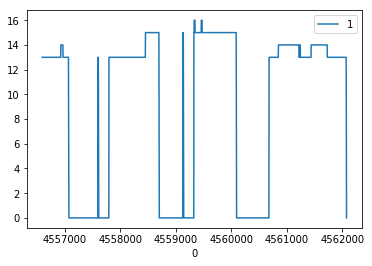

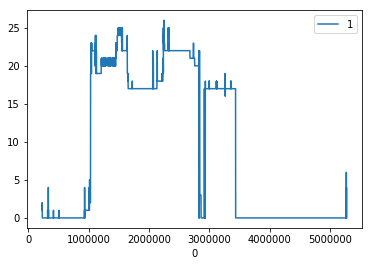

In [24]:
for i in range(3,5):
    if os.path.isfile(f'reachabilityt1d15.{i}.in'):
        df = pd.read_table(f'reachabilityt1d15.{i}.in', header=None, index_col=0)
        df = smooth(df)
        df.plot()

In [73]:
tb = smooth(tb)
tb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835211 entries, 1 to 4835211
Data columns (total 1 columns):
1    float64
dtypes: float64(1)
memory usage: 36.9 MB


In [74]:
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835211 entries, 1 to 4835211
Data columns (total 1 columns):
1    float64
dtypes: float64(1)
memory usage: 36.9 MB


In [43]:
tb.get_value(1,1)

1.0

In [75]:
tb[1] = tb[1].astype(int)
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835211 entries, 1 to 4835211
Data columns (total 1 columns):
1    int64
dtypes: int64(1)
memory usage: 36.9 MB
